RANSAC stands for RANdom SAmple Consensus, which uses random sampling and fitting to reduce the influences of outliers.
RANSAC selects a random number of examples to be inliers and fit a linear regression to it. The rest of the points are tested, and up to a user defined (hyperparameter) tolerance/distance, the test points are classified as inliers versus those that lie outside. Estimate the model error versus the inliers. If this doesn't produce an accurate enough model, restart the process.

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
# We will use the AMES housing dataset by Dean De Cock

df = pd.read_csv('http://jse.amstat.org/v19n3/decock/AmesHousing.txt', sep='\t') # Tab separated
# This is unnecessarily large, so let's pick out a subset of 5 variables, along wit the target
columns = ['Overall Qual', 'Overall Cond', 'Gr Liv Area', 'Central Air', 'Total Bsmt SF', 'SalePrice']

df = df[columns]

# There is only one missing entry. Let's drop that row, since we have a large enough dataset
df = df.dropna(axis=0)
# Let's encode the central air conditioning variable
df['Central Air'] = df['Central Air'].map({'N': 0, 'Y': 1})

In [4]:
from sklearn.model_selection import train_test_split
# Let's start with a 1D example, with the Gr Liv Area
from sklearn.linear_model import RANSACRegressor, LinearRegression

X = df[['Gr Liv Area']].values
y = df['SalePrice'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3)

ransac = RANSACRegressor(LinearRegression(),
                         max_trials=100, # Number of RANSAC iterations to perform
                         min_samples=0.95, # Number of randomly chosen data points need to make up at least 95% of the dataset
                         residual_threshold=None, # sklearn defaults to Mean Absolute Deviation of the target 
                         random_state=1)

# The residual threshold is a model specific criterion value that needs to be adapted appropriately

ransac.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), min_samples=0.95, random_state=1)

The Mean Absolute Deviation criterion allows for 63.33% of the dataset as inliers.


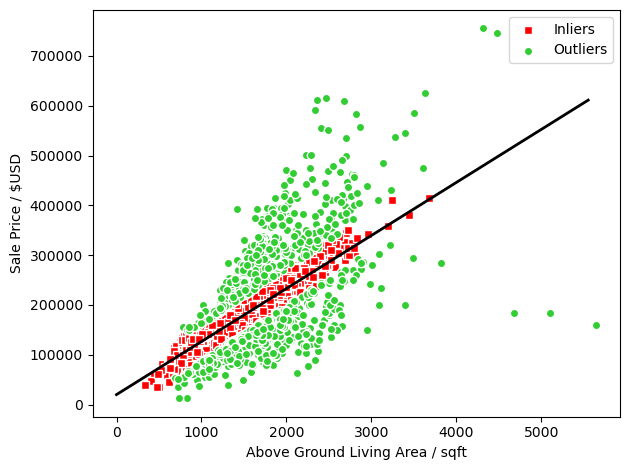

In [12]:
inlier_mask = ransac.inlier_mask_
outlier_mask = np.logical_not(inlier_mask)
X_line = np.arange(0, np.max(X), 150)
prediction_line = ransac.predict(X_line.reshape(-1, 1))

print(f"The Mean Absolute Deviation criterion allows for {np.mean(inlier_mask)*100:.2f}% of the dataset as inliers.")

plt.scatter(X[inlier_mask], y[inlier_mask], c='red', marker='s', label="Inliers", edgecolor='white')
plt.scatter(X[outlier_mask], y[outlier_mask], c='limegreen', marker='o', label="Outliers", edgecolor='white')

plt.plot(X_line, prediction_line, color='black', lw=2)
plt.xlabel('Above Ground Living Area / sqft')
plt.ylabel('Sale Price / $USD')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [ ]:
# Clearly this is far more robust than before - the outliers are not considered
print(f"The RANSAC model predicts: y = {ransac.estimator_.coef_[0]:.3f} * x + {ransac.estimator_.intercept_:.3f}")
print(f"Mean Absolute Deviation: {np.mean(np.abs(y - np.mean(y))):.2f}. This is the value that RANSAC uses automatically as an inlier threshold.")

The RANSAC model predicts: y = 106.509 * x + 20070.626
Mean Absolute Deviation: 58269.56. This is the value that RANSAC uses automatically as an inlier threshold.


In [15]:
# To increase the number of points accepted as inliers is to increase the threshold value
ransac2 = RANSACRegressor(LinearRegression(),
                         max_trials=100, # Number of RANSAC iterations to perform
                         min_samples=0.95, # Number of randomly chosen data points need to make up at least 95% of the dataset
                         residual_threshold=70000, # sklearn defaults to Mean Absolute Deviation of the target 
                         random_state=1)

# The residual threshold is a model specific criterion value that needs to be adapted appropriately

ransac2.fit(X, y)

RANSACRegressor(estimator=LinearRegression(), min_samples=0.95, random_state=1,
                residual_threshold=70000)

The Mean Absolute Deviation criterion allows for 85.05% of the dataset as inliers.


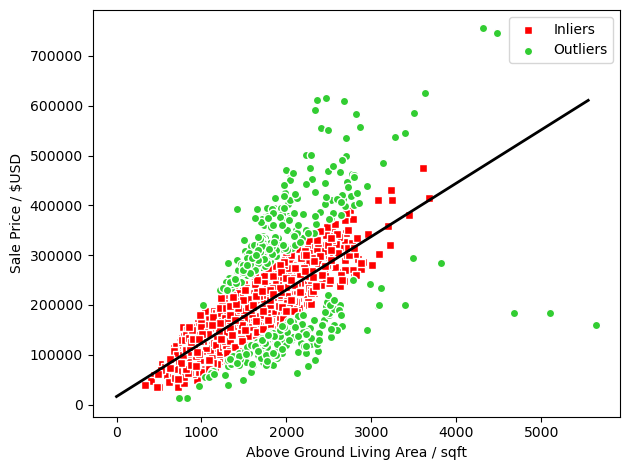

In [16]:
inlier_mask2 = ransac2.inlier_mask_
outlier_mask2= np.logical_not(inlier_mask2)
X_line = np.arange(0, np.max(X), 150)
prediction_line2 = ransac2.predict(X_line.reshape(-1, 1))

print(f"The Mean Absolute Deviation criterion allows for {np.mean(inlier_mask2)*100:.2f}% of the dataset as inliers.")

plt.scatter(X[inlier_mask2], y[inlier_mask2], c='red', marker='s', label="Inliers", edgecolor='white')
plt.scatter(X[outlier_mask2], y[outlier_mask2], c='limegreen', marker='o', label="Outliers", edgecolor='white')

plt.plot(X_line, prediction_line2, color='black', lw=2)
plt.xlabel('Above Ground Living Area / sqft')
plt.ylabel('Sale Price / $USD')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [17]:
print(f"The RANSAC model predicts: y = {ransac2.estimator_.coef_[0]:.3f} * x + {ransac2.estimator_.intercept_:.3f}")

The RANSAC model predicts: y = 107.128 * x + 16192.868
